In [26]:
import numpy as np
import sympy as smp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [27]:
# Define symbols
t, g, m1, m2, l1, l2 = smp.symbols('t g m1 m2 l1 l2', real = True)
the1, the2 = smp.symbols('theta_1 theta_2', cls = smp.Function)
the1, the2 = the1(t), the2(t)
the1d, the2d = smp.diff(the1, t), smp.diff(the2, t)
the1dd, the2dd = smp.diff(the1d, t), smp.diff(the2d, t)
x1, y1 = l1 * smp.sin(the1), -(l1 * smp.cos(the1))
x2, y2 = x1 + (l2 * smp.sin(the2)), y1 - (l2 * smp.cos(the2))

In [28]:
# Kinetic energy
T = (((1 / 2) * m1 * ((smp.diff(x1, t))**2 + (smp.diff(y1, t))**2)) + ((1 / 2) * m2 * ((smp.diff(x2, t))**2 + (smp.diff(y2, t))**2))).simplify()

# Potential energy
V = ((m1 * g * y1) + (m2 * g * y2)).simplify()

# Define Lagrangian
L = T - V

In [29]:
# Obtain Lagrange's equations
LE1 = (smp.diff(L, the1) - smp.diff(smp.diff(L, the1d), t)).simplify()
LE2 = (smp.diff(L, the2) - smp.diff(smp.diff(L, the2d), t)).simplify()

# Solve for the1dd and the2dd
solutions = smp.solve([LE1, LE2], (the1dd, the2dd))
eq_motion_1 = solutions[the1dd].simplify()
eq_motion_2 = solutions[the2dd].simplify()

In [30]:
# Obtain numerical equations of motion
eq_motion1_f = smp.lambdify([g, m1, m2, l1, l2, the1, the1d, the2, the2d], eq_motion_1)
eq_motion2_f = smp.lambdify([g, m1, m2, l1, l2, the1, the1d, the2, the2d], eq_motion_2)

In [31]:
# Define derivative function
def dSdt(t, S, g, m1, m2, l1, l2):
    theta1, theta1d, theta2, theta2d = S
    return [
        theta1d,
        eq_motion1_f(g, m1, m2, l1, l2, theta1, theta1d, theta2, theta2d),
        theta2d,
        eq_motion2_f(g, m1, m2, l1, l2, theta1, theta1d, theta2, theta2d)
    ]

In [32]:
# Define parameters and initial conditions
# Parameters
g = 9.81
m1 = 0.1
m2 = 0.1
l1 = 0.2
l2 = 0.2

# Initial conditions
theta1_0 = np.pi / 2
theta1d_0 = 0
theta2_0 = np.pi / 2 + 0.01
theta2d_0 = 0

In [33]:
# Time span and interval
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

In [50]:
# Solve the differential equations
sols = solve_ivp(dSdt, t_span, [theta1_0, theta1d_0, theta2_0, theta2d_0], t_eval = t_eval, args = (g, m1, m2, l1, l2))
theta1 = sols.y[0]
theta1d = sols.y[1]
theta2 = sols.y[2]
theta2d = sols.y[3]
x1, y1 = l1 * np.sin(theta1), -(l1 * np.cos(theta1))
x2, y2 = x1 + (l2 * np.sin(theta2)), y1 - (l2 * np.cos(theta2))

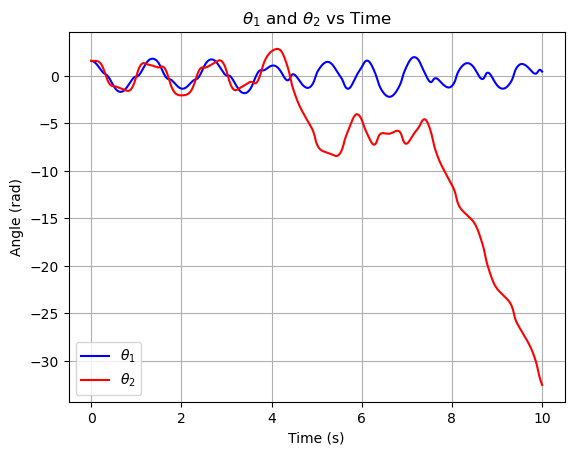

In [51]:
# Plot the angles vs. time
plt.plot(t_eval, theta1, color = 'b', label = r'$\theta_1$')
plt.plot(t_eval, theta2, color = 'r', label = r'$\theta_2$')
plt.title(r'$\theta_1$ and $\theta_2$ vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid()
plt.legend()
plt.show()

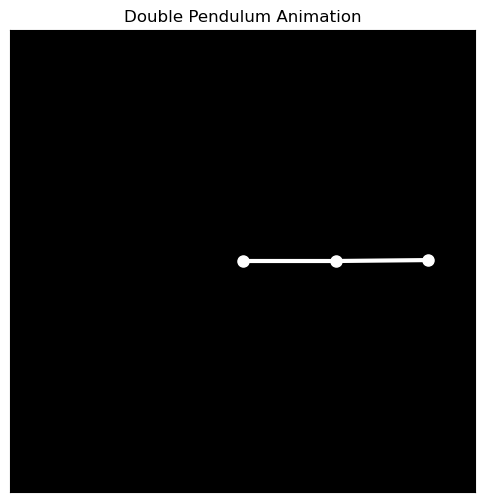

In [53]:
# Animation
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.set_facecolor('k')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Double Pendulum Animation')
ln1, = plt.plot([], [], 'wo-', lw = 3, markersize = 8)

def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])

ani = animation.FuncAnimation(fig, animate, frames = len(t_eval), interval = 20)
ani.save('dpa.gif', writer = 'pillow', fps = 50)